<a href="https://colab.research.google.com/github/jbogarin74/Wobbles/blob/master/DASC_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## DASC 500: Introduction to Data Analytics
## Assignment #4
## Due 26 February 2020
## Jorge Bogarin

In [0]:
## Import packages
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy as sp
import statsmodels.api as sm 
import statistics as st

In [8]:
## Import of mtcars data set.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mtcars.xlsx to mtcars (1).xlsx
User uploaded file "mtcars.xlsx" with length 18286 bytes


In [0]:
mt = pd.read_excel('mtcars.xlsx')

In [10]:
mt.shape

(32, 11)

In [11]:
mt.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
## PROBLEM 1

In [0]:
## The code below, partitions the mtcars data using a 70/30 split.

In [0]:
## In addition, I generate the ramdom sample using sample() and drop() functions.

In [0]:
train_data = mt.sample(frac = 0.7) 
test_data = mt.drop(train_data.index)

In [0]:
## Set random_state = 42. Setting to 42 ensures reproducibility, so our results are the same for our
#  regression models, for easier comparison.
random_state = 42

In [0]:
## train_data.shape confirms 70% of data in train_data

In [13]:
train_data.shape

(22, 11)

In [0]:
# test_data.shape confirms 30% of data in test_data

In [0]:
test_data.shape

In [0]:
y = train_data["mpg"]
X1 = train_data["cyl"]

In [15]:
X1 = sm.add_constant(X1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model1 = sm.OLS(y, X1)

In [0]:
model1_fit = model1.fit()

In [37]:
## model residuals, assumption 1. (Extra work)
model_residuals = model1_fit.resid

st.mean(model_residuals)

1.6148698540002277e-16

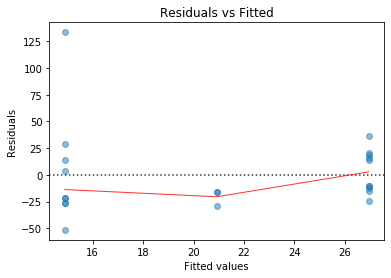

In [40]:
plot = sb.residplot(model1_fit.fittedvalues,
                    train_data.columns[3],
                    data=train_data,
                    lowess=True,
                    scatter_kws={'alpha': 0.5},
                    line_kws={'color': 'red', 'lw' : 1, 'alpha': 0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

plt.show(plot)

In [18]:
## PROBLEM 2
## To what degree does the cyl variable impact mpg?
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     50.02
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           7.41e-07
Time:                        02:29:09   Log-Likelihood:                -53.793
No. Observations:                  22   AIC:                             111.6
Df Residuals:                      20   BIC:                             113.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0250      2.463     14.625      0.0

In [19]:
X_new = test_data['carb']
X_new = sm.add_constant(X_new)

# Make the predictions by the model (Extra work)
test_data["predictions"] = model1_fit.predict(X_new)

test_data

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predictions
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,25.432143
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,33.376786
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,25.432143
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,28.080357
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,25.432143
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,30.728571
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,33.376786
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,30.728571
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,25.432143
31,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2,30.728571


In [20]:
## Model 2 with 'disp' variable
## To what degree does the disp variable impact mpg?
X2 = train_data["disp"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2)
model2_fit = model2.fit()
print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     45.11
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.55e-06
Time:                        02:29:44   Log-Likelihood:                -54.593
No. Observations:                  22   AIC:                             113.2
Df Residuals:                      20   BIC:                             115.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2370      1.497     18.867      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
## Model 3 with 'hp' variable
## To what degree does the hp variable impact mpg?
X3 = train_data["hp"]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3)
model3_fit = model3.fit()
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     26.74
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.65e-05
Time:                        02:29:48   Log-Likelihood:                -58.240
No. Observations:                  22   AIC:                             120.5
Df Residuals:                      20   BIC:                             122.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1555      1.898     14.837      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
## Model 4 with 'drat' variable
## To what degree does the drat variable impact mpg?
X4 = train_data["drat"]
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4)
model4_fit = model4.fit()
print(model4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     15.90
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           0.000724
Time:                        02:29:50   Log-Likelihood:                -61.141
No. Observations:                  22   AIC:                             126.3
Df Residuals:                      20   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1948      6.421     -0.965      0.3

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
## Model 5 with 'wt' variable
## To what degree does the wt variable impact mpg?
X5 = train_data["wt"]
X5 = sm.add_constant(X5)
model5 = sm.OLS(y, X5)
model5_fit = model5.fit()
print(model5_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     60.47
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.80e-07
Time:                        02:29:53   Log-Likelihood:                -52.263
No. Observations:                  22   AIC:                             108.5
Df Residuals:                      20   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6036      2.441     15.408      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
## Model 6 with 'qsec' variable
## To what degree does the qsec variable impact mpg?
X6 = train_data["qsec"]
X6 = sm.add_constant(X6)
model6 = sm.OLS(y, X6)
model6_fit = model6.fit()
print(model6_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     4.070
Date:                Tue, 25 Feb 2020   Prob (F-statistic):             0.0573
Time:                        02:29:56   Log-Likelihood:                -65.539
No. Observations:                  22   AIC:                             135.1
Df Residuals:                      20   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9711     10.535     -0.187      0.8

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
## Model 7 with 'vs' variable
## To what degree does the vs variable impact mpg?
X7 = train_data["vs"]
X7 = sm.add_constant(X7)
model7 = sm.OLS(y, X7)
model7_fit = model7.fit()
print(model7_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9.763
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00534
Time:                        02:29:58   Log-Likelihood:                -63.204
No. Observations:                  22   AIC:                             130.4
Df Residuals:                      20   BIC:                             132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6846      1.245     13.401      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
## Model 8 with 'am' variable
## To what degree does the am variable impact mpg?
X8 = train_data["am"]
X8 = sm.add_constant(X8)
model8 = sm.OLS(y, X8)
model8_fit = model8.fit()
print(model8_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7.232
Date:                Tue, 25 Feb 2020   Prob (F-statistic):             0.0141
Time:                        02:30:00   Log-Likelihood:                -64.181
No. Observations:                  22   AIC:                             132.4
Df Residuals:                      20   BIC:                             134.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5250      1.173     14.938      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
## Model 9 with 'gear' variable
## To what degree does the gear variable impact mpg?
X9 = train_data["gear"]
X9 = sm.add_constant(X9)
model9 = sm.OLS(y, X9)
model9_fit = model9.fit()
print(model9_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5.071
Date:                Tue, 25 Feb 2020   Prob (F-statistic):             0.0357
Time:                        02:30:03   Log-Likelihood:                -65.091
No. Observations:                  22   AIC:                             134.2
Df Residuals:                      20   BIC:                             136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4165      5.324      1.393      0.1

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
## Model 10 with 'carb' variable
## To what degree does the carb variable impact mpg?
X10 = train_data["carb"]
X10 = sm.add_constant(X10)
model10 = sm.OLS(y, X10)
model10_fit = model10.fit()
print(model10_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     6.589
Date:                Tue, 25 Feb 2020   Prob (F-statistic):             0.0184
Time:                        02:30:06   Log-Likelihood:                -64.444
No. Observations:                  22   AIC:                             132.9
Df Residuals:                      20   BIC:                             135.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4508      1.950     12.025      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
## PROBLEM 3
# I would chose the "drat" predictor. 

In [0]:
## PROBLEM 4
# In choosing Model 4, the "drat" variable had the greatest coef with 9.6278 compared to all other models. 
# This means that the "drat" variable had the highest positive impact on const mpg. 
# The R-squared is 0.626 meaning the variance of adding "drat" is a good predictor for changes in mpg.
# For every change in "drat", the mpg is increasing by 9.63. 
# The std err is 1.664 meaning is has some effect. 
# The 0.00 P value means there is a 0% chance that the const for drat is zero. 

In [0]:
## Problem 5: Single model with all 10 predictors.

In [37]:
## Model 11 with all ten variables
X11 = train_data[{"cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"}]
X11 = sm.add_constant(X11)
model11 = sm.OLS(y, X11)
model11_fit = model11.fit()
print(model11_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     11.74
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           0.000164
Time:                        02:30:42   Log-Likelihood:                -40.546
No. Observations:                  22   AIC:                             103.1
Df Residuals:                      11   BIC:                             115.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7273     21.631      0.126      0.9

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
## PROBLEM 6
# The results in Problem #1 do not align with the results in Problem #5. It's possible that they do not
# align because of the variations in the random sample or the models differ in comparing variables 
# one-by-one versus all-at-once.